In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

  Coefficient Name  Coefficient Value  Standard Error    T-Value   P-Value  \
0        Intercept       -1284.802660       66.178539 -19.414189  0.000000   
1               X1          27.599104        1.193160  23.131108  0.000000   
2               X2          52.650219        0.965362  54.539336  0.000000   
3               X3           0.210061        0.442268   0.474963  0.635892   

   is_significant  
0            True  
1            True  
2            True  
3           False  


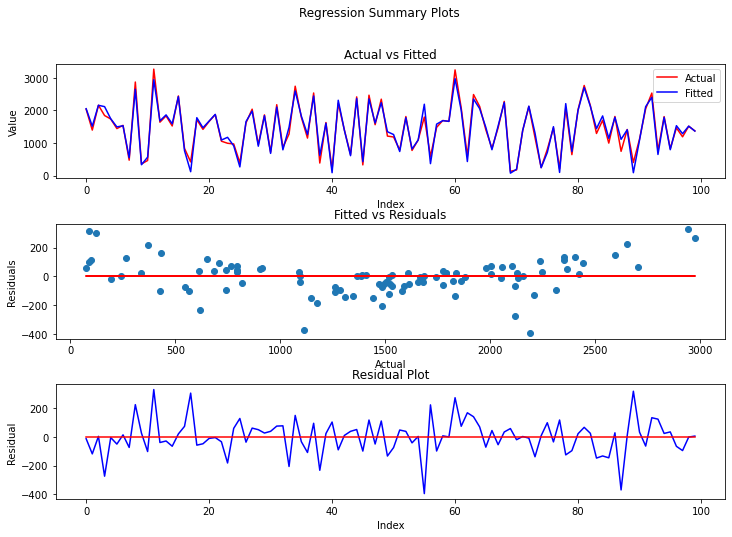

In [2]:
from linear_regression import LinearRegression
X1 = np.random.normal(50,10,100)
X2 = np.random.uniform(0,50,100)
X3 = np.random.uniform(0, 100, 100)
y = 2*X1 + 3*X2 + X1 * X2 + np.random.normal(10,5,100)
df = pd.DataFrame({'X1':X1, 'X2': X2, 'X3': X3, 'y':y})
X = df.drop('y',axis=1)
y = df.y

lr = LinearRegression()
lr.fit(X=X, y=y)
lr.summary(significant_threshold=0.05)
lr.plot_regression_summary()

## Test Linear Regression

Epoch = 0 , MSE = 26358.427572233857
Epoch = 100 , MSE = 844.3930905628056
Epoch = 200 , MSE = 405.8628719464069
Epoch = 300 , MSE = 398.2683842659082
Epoch = 400 , MSE = 398.1358515152262
The Algorithm Has Converged


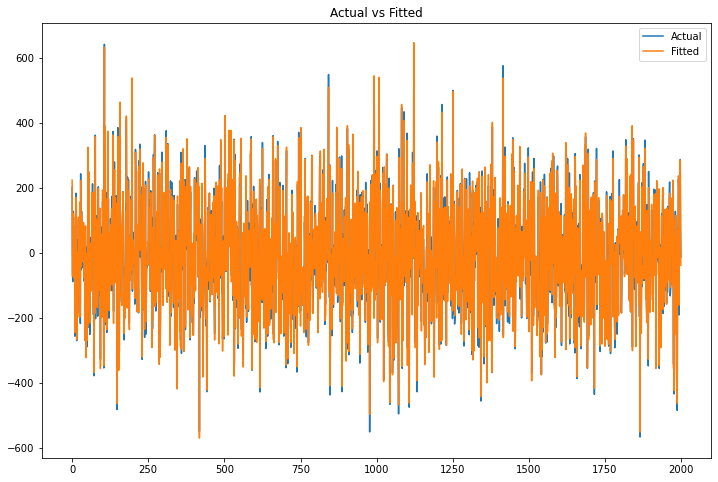

In [3]:
from linear_models import LinearRegression
X, y = datasets.make_regression(n_samples = 10000, n_features=10, noise=20, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LinearRegression(lr=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(12,8))
plt.plot(y_test)
plt.plot(y_pred)
plt.title('Actual vs Fitted')
plt.legend(['Actual', 'Fitted'])
plt.show()

## Test Logistic Regression

In [4]:
from linear_models import LogisticRegression
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression(lr=0.02, epochs = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy = {round(model.accuracy(y_test, y_pred),2)}")
print("Confusion Matrix")
print(cm)

Epoch = 0 , Accuracy = 0.3758241758241758
Epoch = 100 , Accuracy = 0.7186813186813187
Epoch = 200 , Accuracy = 0.8549450549450549
Epoch = 300 , Accuracy = 0.9098901098901099
Epoch = 400 , Accuracy = 0.9010989010989011
Epoch = 500 , Accuracy = 0.7406593406593407
Epoch = 600 , Accuracy = 0.9120879120879121
Epoch = 700 , Accuracy = 0.9120879120879121
Epoch = 800 , Accuracy = 0.9120879120879121
Epoch = 900 , Accuracy = 0.9142857142857143
Accuracy = 0.93
Confusion Matrix
[[36  5]
 [ 3 70]]


## Test K-Nearest Neighbors

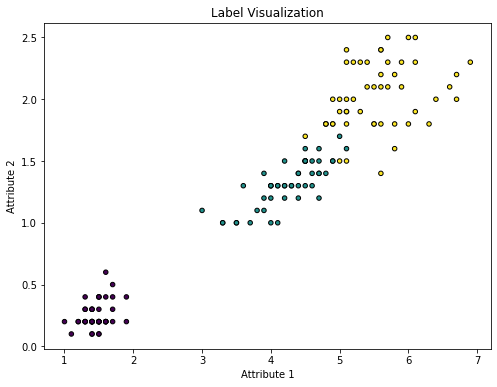

Accuracy = 0.97
Confusion Matrix
[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]


In [5]:
from KNN import KNN
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
plt.figure(figsize=(8,6))
plt.scatter(X[:,2], X[:,3], c=y, edgecolor = 'k', s=20)
plt.title('Label Visualization')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.show()
knn_clf = KNN(k=3)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy = {round(accuracy,2)}")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

## Test Decision Tree

In [6]:
from decision_tree import DecisionTree
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

d_tree = DecisionTree()
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy = {round(accuracy,2)}")
print("Confusion Matrix")
print(cm)

Accuracy = 0.96
Confusion Matrix
[[38  3]
 [ 1 72]]


## Test Random Forests

In [7]:
from random_forest import RandomForest
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

rf_clf = RandomForest(n_trees=10, max_depth=10, min_samples_split=2, n_features=None)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy = {round(accuracy,2)}")
print("Confusion Matrix")
print(cm)

Accuracy = 0.97
Confusion Matrix
[[40  1]
 [ 2 71]]
